# 03 Homework
© Copyright: 2024, Selma Hadzic, all rights reserved.

#### Number of points: 15 (weights 15% in the final grade)


1. Pull from the `ESMT_2024_DataScraping_Lectures` repository: you should get this `03_Homework` file
2. Launch VS Code and open your working-folder
3. Create a `Session_03` folder, in which you create another folder called `data`
4. Copy paste the notebook `03_Homework` from the lectures repo to the working-folder. Copy the csv files `movies.csv` and `movies_metadata.csv` into the `working-folder/Session_03/data` directory.
5. Do the exercises on 03_Homework in your working-folder
6. Once you are finished, copy-Paste the notebook into `ESMT_2024_DataScraping_Students` folder in your computer
8. Commit and push your homework in your branch before the deadline

#### Deadline: October 21st 08:59 am CET

#### Any missed deadline without justification to the Administration will result in 0 points for this homework.
#### If the Github branch is not correctly named using the indicated format **LASTNAME_firstname**, then a penalty of -2 points will be applied

## 1. Exploration and data cleaning (6 points)

In [1]:
import pandas as pd

**1.1. Read the dataset `movies.csv` and visualise it**

In [2]:
df_movies = pd.read_csv('/Users/cb/Documents/Data_Scraping/working-folder/Session_03/data/movies.csv')

In [3]:
# Check  by displaying
df_movies

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9994,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n \n Stars:\nMorgan Taylor Camp...,NaN,NaN,NaN
9995,Arcane,(2021– ),"\nAnimation, Action, Adventure",NaN,\nAdd a Plot\n,\n,NaN,NaN,NaN
9996,Heart of Invictus,(2022– ),"\nDocumentary, Sport",NaN,\nAdd a Plot\n,\n Director:\nOrlando von Einsiedel\n| \n ...,NaN,NaN,NaN
9997,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n Director:\nJovanka Vuckovic\n| \n Sta...,NaN,NaN,NaN


**1.2 Display the size and the number of missing data points per column of the DataFrame**

In [4]:
df_movies.isnull().sum()
#-> 9999 rows × 9 columns from above

MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES       1820
RunTime     2958
Gross       9539
dtype: int64

**1.3 Fill the NaN and replace the original dataset**
- YEAR: 'Unknown'
- GENRE: 'Unknown'
- RATING: with the median value
- VOTES: 0

We leave the NaN of RunTime and Gross for now, as there is no straightforward way to fill them.

In [5]:
df_movies = df_movies.fillna({
    'YEAR': 'Unknown',
    'GENRE': 'Unknown',
    'RATING': df_movies['RATING'].median(),
    'VOTES': 0
}) #using key value pairs imo most straightforward method would be also possible to do every column with a single operation
df_movies

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",7.1,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9994,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",7.1,\nAdd a Plot\n,\n \n Stars:\nMorgan Taylor Camp...,0,NaN,NaN
9995,Arcane,(2021– ),"\nAnimation, Action, Adventure",7.1,\nAdd a Plot\n,\n,0,NaN,NaN
9996,Heart of Invictus,(2022– ),"\nDocumentary, Sport",7.1,\nAdd a Plot\n,\n Director:\nOrlando von Einsiedel\n| \n ...,0,NaN,NaN
9997,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",7.1,\nAdd a Plot\n,\n Director:\nJovanka Vuckovic\n| \n Sta...,0,NaN,NaN


In [6]:
df_movies[['YEAR', 'GENRE', 'RATING', 'VOTES']].isna().sum() #Short check if the operation worked 
df_movies

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",7.1,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9994,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",7.1,\nAdd a Plot\n,\n \n Stars:\nMorgan Taylor Camp...,0,NaN,NaN
9995,Arcane,(2021– ),"\nAnimation, Action, Adventure",7.1,\nAdd a Plot\n,\n,0,NaN,NaN
9996,Heart of Invictus,(2022– ),"\nDocumentary, Sport",7.1,\nAdd a Plot\n,\n Director:\nOrlando von Einsiedel\n| \n ...,0,NaN,NaN
9997,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",7.1,\nAdd a Plot\n,\n Director:\nJovanka Vuckovic\n| \n Sta...,0,NaN,NaN


**1.4 Drop the duplicated rows**

In [7]:
df_movies = df_movies.drop_duplicates()
df_movies #  9568 rows × 9 columns -> the number of rows decreased so we can asume that the operatioon worked

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",7.1,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9993,Totenfrau,(2022– ),"\nDrama, Thriller",7.1,\nAdd a Plot\n,\n Director:\nNicolai Rohde\n| \n Stars:...,0,NaN,NaN
9995,Arcane,(2021– ),"\nAnimation, Action, Adventure",7.1,\nAdd a Plot\n,\n,0,NaN,NaN
9996,Heart of Invictus,(2022– ),"\nDocumentary, Sport",7.1,\nAdd a Plot\n,\n Director:\nOrlando von Einsiedel\n| \n ...,0,NaN,NaN
9997,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",7.1,\nAdd a Plot\n,\n Director:\nJovanka Vuckovic\n| \n Sta...,0,NaN,NaN


**1.5 Replace the columns names to make them all lowercase**

In [8]:
df_movies.columns = df_movies.columns.str.lower()


In [9]:
df_movies.columns 


Index(['movies', 'year', 'genre', 'rating', 'one-line', 'stars', 'votes',
       'runtime', 'gross'],
      dtype='object')

**1.6 Convert the `votes` column into a `float type`**

*Hint: the U.K. and U.S. use a comma to separate groups of thousands. You might need to remove this comma first before converting the numbers*

In [10]:
df_movies.loc[:, 'votes'] = df_movies['votes'].str.replace(',', '').astype(float)


In [11]:
df_movies #quick check, it seems that this worked used .loc before i was getting a warning before and the warning suggested to use loc

,movies,year,genre,rating,one-line,stars,votes,runtime,gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,21062.0,121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...",17870.0,25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...",885805.0,44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...",414849.0,23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",7.1,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9993,Totenfrau,(2022– ),"\nDrama, Thriller",7.1,\nAdd a Plot\n,\n Director:\nNicolai Rohde\n| \n Stars:...,NaN,NaN,NaN
9995,Arcane,(2021– ),"\nAnimation, Action, Adventure",7.1,\nAdd a Plot\n,\n,NaN,NaN,NaN
9996,Heart of Invictus,(2022– ),"\nDocumentary, Sport",7.1,\nAdd a Plot\n,\n Director:\nOrlando von Einsiedel\n| \n ...,NaN,NaN,NaN
9997,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",7.1,\nAdd a Plot\n,\n Director:\nJovanka Vuckovic\n| \n Sta...,NaN,NaN,NaN


## 2. Descriptive statistics (5 points)

**2.1 What is the average rating?**

In [12]:
average_rating = df_movies['rating'].mean()
print(average_rating) 

6.94608068561873


**2.2 What is the maximum runtime?**

In [13]:
max_runtime = df_movies['runtime'].max()
print(max_runtime)


853.0


**2.3 Filter the dataset to show which movie/serie has the longest runtime**

In [14]:
longest_runtime_movie = df_movies.loc[df_movies['runtime'].idxmax()]
longest_runtime_movie  #Movie:El tiempo entre costuras its a series 


movies                               El tiempo entre costuras
year                                              (2013–2014)
genre                 \nAdventure, Drama, History            
rating                                                    8.3
one-line    \nSira Quiroga is a young Spanish dressmaker e...
stars       \n            \n    Stars:\nAdriana Ugarte, \n...
votes                                                  3876.0
runtime                                                 853.0
gross                                                     NaN
Name: 1902, dtype: object

**2.4 Plot the histogram of runtimes, filtering on (0, 200) range with 200 bins**

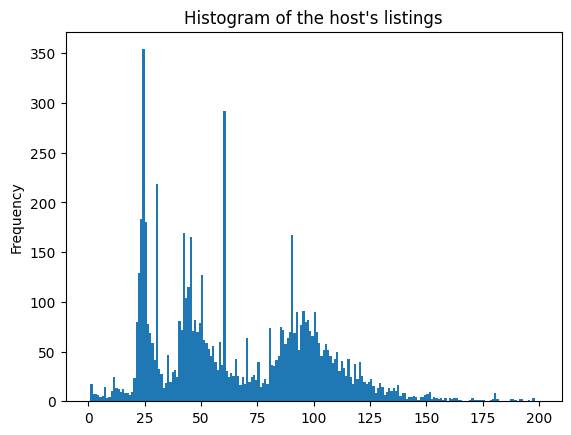

In [15]:
df_movies['runtime'].plot(kind='hist', title="Histogram of the host's listings", range = (0,200), bins = 200);

**2.5 What is the number of votes a movie needs to have, to be in the top 10% most voted film?**

*Tip: the 90th quantile*

In [16]:
top_10_percent_votes = df_movies['votes'].quantile(0.90)
print(top_10_percent_votes)


22193.100000000035


## 3. Merging datasets (4 points)

**Read `movies_metadata.csv` and assign it to a `df_meta` variable**

**Create a `merge_df` DataFrame from an `inner join` between `df` and `df_meta`**

*Hint: you need to find the right key to join on*

In [17]:
df_meta = pd.read_csv("/Users/cb/Documents/Data_Scraping/working-folder/Session_03/data/movies_metadata.csv")
df_meta.head()

/var/folders/64/gjpr5_bx66b8k4qfzs080kn80000gn/T/ipykernel_71833/374333593.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_meta = pd.read_csv("/Users/cb/Documents/Data_Scraping/working-folder/Session_03/data/movies_metadata.csv")


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [18]:
merge_df = pd.merge(df_movies, df_meta, left_on='movies', right_on='original_title', how='inner')
merge_df


,movies,year,genre,rating,one-line,stars,votes,runtime_x,gross,adult,...,release_date,revenue,runtime_y,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...",885805.0,44.0,NaN,False,...,1995-02-24,0.0,88.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Surviving the streets was just a rehearsal.,The Walking Dead,False,6.6,4.0
1,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...",885805.0,44.0,NaN,False,...,1936-03-14,0.0,66.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,HE DIED a man with a hunger to love... and ret...,The Walking Dead,False,6.6,14.0
2,Lucifer,(2016–2021),"\nCrime, Drama, Fantasy",8.1,\nLucifer Morningstar has decided he's had eno...,"\n \n Stars:\nTom Ellis, \nLesle...",264222.0,42.0,NaN,False,...,2014-10-22,0.0,108.0,"[{'iso_639_1': 'es', 'name': 'Español'}]",Released,NaN,Lucifer,False,5.8,4.0
3,The Good Doctor,(2017– ),\nDrama,8.1,"\nShaun Murphy, a young surgeon with autism an...","\n \n Stars:\nFreddie Highmore, ...",70871.0,41.0,NaN,False,...,2011-01-01,5206.0,93.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Do no harm.,The Good Doctor,False,5.0,52.0
4,Supernatural,(2005–2020),"\nDrama, Fantasy, Horror",8.4,\nTwo brothers follow their father's footsteps...,"\n \n Stars:\nJared Padalecki, \...",404273.0,44.0,NaN,False,...,1933-05-12,0.0,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Supernatural,False,4.3,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1627,Far Cry,Unknown,"\nAnimation, Action, Adventure",7.1,\nPlot under wraps. Adaptation of the Ubisoft ...,\n,NaN,NaN,NaN,False,...,2008-01-01,0.0,95.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Far Cry,False,3.1,73.0
1628,Oceans,Unknown,\nDocumentary,7.1,"\nThe stories of the oceans of the planet, whi...",\n,NaN,NaN,NaN,False,...,2009-10-17,19406406.0,84.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,Explore the depths of our planet's oceans. Ex...,Oceans,False,7.3,112.0
1629,How to Win the US Presidency,(2016),\nDocumentary,6.2,\nThis whimsical look at rough-and-tumble Amer...,\n Director:\nCal Seville\n| \n Stars:\n...,127.0,50.0,NaN,False,...,2016-08-01,0.0,50.0,[],Released,NaN,How to Win the US Presidency,False,0.0,0.0
1630,Curtain,Unknown,Unknown,7.1,\nA female nurse escaping traumatic events who...,\n Director:\nMohamed Alsalman\n,NaN,NaN,NaN,False,...,2015-11-19,0.0,74.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Curtain,False,5.4,8.0
